In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from efootball.src.utils.geometry import define_center_point
from efootball.src.classes.models.HomographyProjection import HomographyProjection
from efootball.src.classes.models.TeamsSegmentation import TeamsSegmentation
from efootball.src.classes.metrics.BallMetrics import BallMetrics
from efootball.src.classes.models.PersonDetector import PersonDetector
from efootball.src.classes.models.BallDetector import BallDetector

from efootball.src.constants.teams import BALL_COLOR, TEAMS_COLORS_RGB

Segmentation Models: using `keras` framework.


c:\Users\ferna\anaconda3\envs\efootball\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
field_image = cv2.imread('C:/Users/ferna/OneDrive/Documentos/Insper/Efootball/data/frames/90.png')
field_image = cv2.cvtColor(field_image, cv2.COLOR_BGR2RGB)
image_with_persons = field_image.copy()
field_image = cv2.resize(field_image, (320, 320))
points_field_image = field_image.copy()

In [3]:
homography = HomographyProjection(backbone="efficientnetb3", num_classes=29, input_shape=(320,320))
person_detector = PersonDetector(threshold=0.6)
teams_segmentation = TeamsSegmentation(num_clusters=4)

In [4]:
teams_segmentation.define_teams_colors(image_with_persons)

c:\Users\ferna\anaconda3\envs\efootball\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
c:\Users\ferna\anaconda3\envs\efootball\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
person_predictions = person_detector.detect_persons(image_with_persons)
player_predictions = teams_segmentation.get_players(image_with_persons, person_predictions)

In [7]:
persons_locations = person_detector.detect_persons(image_with_persons)

In [8]:
tx = image_with_persons.shape[0]/320
ty = image_with_persons.shape[1]/320
persons_points, colors = list(), list()
i = 0
for box, teams in zip(player_predictions["boxes"], player_predictions['teams']):
    player_center_point = define_center_point(box)
    point = np.array([player_center_point[0]/ty, player_center_point[1]/tx])
    persons_points.append(point)
    colors.append(TEAMS_COLORS_RGB[teams]["color_code"])

In [9]:
persons_points

[array([267.        , 205.62962963]),
 array([144.33333333, 165.92592593]),
 array([150.16666667, 133.92592593]),
 array([247.66666667, 208.59259259]),
 array([131.16666667, 215.11111111]),
 array([140.16666667, 144.59259259]),
 array([257.33333333, 163.25925926]),
 array([214.        , 110.22222222]),
 array([212.        , 218.07407407]),
 array([202.66666667, 178.07407407]),
 array([198.83333333, 110.51851852]),
 array([233.66666667, 139.25925926]),
 array([158.       , 192.2962963]),
 array([121.66666667, 219.25925926]),
 array([ 93.33333333, 127.40740741]),
 array([190.83333333, 130.07407407]),
 array([221.5       , 124.14814815]),
 array([203.5       , 134.81481481])]

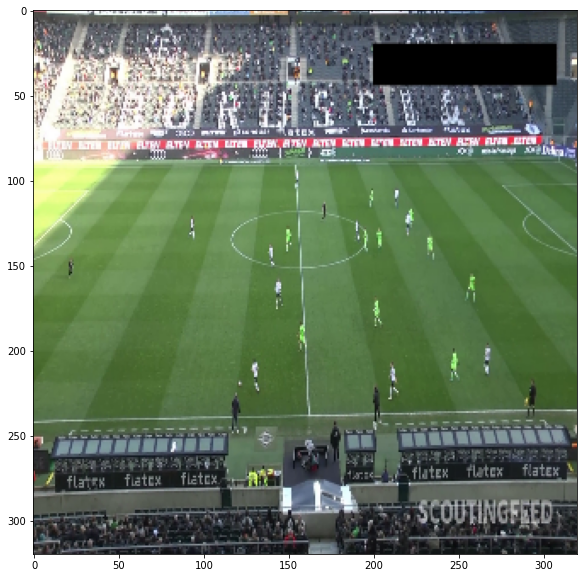

In [10]:
plt.figure(figsize=(20, 10))
plt.imshow(points_field_image)
plt.show()

In [12]:
prediction = homography.get_field_map_with_players(field_image, persons_points, colors)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


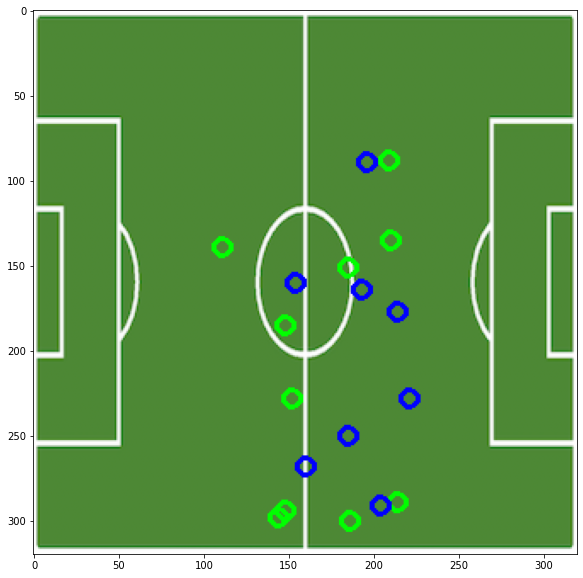

In [13]:
homography.visualize(prediction)